# **Implement Decision tree classifier from scratch using Dataset 1**

## **Importing dataset**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/play_tennis.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/play_tennis.csv'

## **Entropy function**

In [ ]:
from math import log
def entropy(a_l):
    lst = list(a_l)
    size = len(lst)
    entropy_val = 0
    unique_elements = len(set(lst))
    if unique_elements in [0, 1]:
        return 0
    for i in set(lst):
        occ = lst.count(i)
        entropy_val -= occ / size * log(occ / size, 2)
    return entropy_val

In [ ]:
y = df['play']
X = df.drop(columns=['play', 'day'])
feature_names = X.columns

In [ ]:
y_entropy = entropy(y)
print(y_entropy)

## **Information Gain**

In [ ]:
def gain(root, left, right):
    return (
        entropy(root)
        - 1.0 * len(left) / len(root) * entropy(left)
        - 1.0 * len(right) / len(root) * entropy(right)
    )

In [ ]:
def information_gains(X, y):
    out = []
    for column in X.columns:
        unique_values = X[column].unique()
        total_entropy = entropy(y)
        gain_value = total_entropy  # Initialize gain_value with total entropy
        for val in unique_values:
            subset = y[X[column] == val]
            gain_value -= (len(subset) / len(y)) * entropy(subset)  # Weighted subtraction of entropies
        out.append((column, gain_value))
    return out


In [ ]:
results = information_gains(X, y)
for feature, gain_value in results:
    print(f"Feature: {feature}, Information Gain: {gain_value}")

## **Creating the tree**

In [ ]:
def btree(X, y, feature_names):
    clf = information_gains(X, y)
    best_feature, _ = max(clf, key=lambda x: x[1])
    print(f"Best feature to split: {best_feature}")

    unique_values = X[best_feature].unique()
    for val in unique_values:
        x_subset = X[X[best_feature] == val]
        y_subset = y[X[best_feature] == val]
        print(f"Samples for {best_feature}={val}: {len(x_subset)}")
        print(f"Class label distribution for {best_feature}={val}: {y_subset.value_counts().to_dict()}")

        entropy_val = entropy(y_subset)
        print(f"Entropy for {best_feature}={val}: {entropy_val}")

        if entropy_val != 0:
            print(f"Splitting the group with {len(x_subset)} samples:")
            btree(x_subset, y_subset, feature_names)
        print("_" * 30 + "\n")
btree(X, y, feature_names)

# **Using python libraries to build a decision tree classifier on Dataset 2 and analyzing the results using confusion matrix and accuracy.**

## **Importing the libraries and dataset**

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('/content/Iris.csv')
df1.head()

## **Splitting the dataset**

In [ ]:
# Splitting the dataset into features and target variable
X = df1.drop('Species', axis=1)
y = df1['Species']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Creating a classifier**

In [ ]:
# Creating a decision tree classifier
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

## **Evaluation**

In [ ]:
# Making predictions
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

In [ ]:
# Calculating and printing the confusion matrix and classification report for Gini
print("Decision Tree - Gini")
cm_gini = confusion_matrix(y_test, y_pred_gini)
print("\nConfusion Matrix:")
print(cm_gini)
print("\nClassification Report:")
print(sklearn.metrics.classification_report(y_test, y_pred_gini))

In [ ]:
# Calculating and printing the confusion matrix and classification report for Entropy
print("\nDecision Tree - Entropy")
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("\nConfusion Matrix:")
print(cm_entropy)
print("\nClassification Report:")
print(sklearn.metrics.classification_report(y_test, y_pred_entropy))

## **Plotting the tree**

In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
# Export the decision tree for clf_gini
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot_data_gini=StringIO()
export_graphviz(clf_gini, out_file=dot_data_gini, filled=True,
                rounded=True, special_characters=True, class_names=['Iris-sentosa','Iris-virginica','Iris-versicolor'])
graph_gini = pydotplus.graph_from_dot_data(dot_data_gini.getvalue())
graph_gini.write_png('iris_gini.png')
Image(graph_gini.create_png())

In [ ]:
# Export the decision tree for clf_entropy
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot_data_entropy = StringIO()
export_graphviz(clf_entropy, out_file=dot_data_entropy, filled=True,
                rounded=True, special_characters=True, class_names=['Iris-sentosa','Iris-virginica','Iris-versicolor'])
graph_entropy = pydotplus.graph_from_dot_data(dot_data_entropy.getvalue())
graph_entropy.write_png('iris_entropy.png')
Image(graph_entropy.create_png())

# **Writing a code to show overfitting in the decision tree classifier using sklearn and matplotlib**

## **Making a Synthetic Dataset**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [ ]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=42)
print(X.shape, y.shape)

## **Splitting synthetic dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X_train, y_train)

In [ ]:
y_preds = clf2.predict(X_test)

## **Pruning by changing the depth**

In [ ]:
train_scores,test_scores=list(),list()
values = [i for i in range(1,21)]
for i in values:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train,y_train)
  train_yhat=model.predict(X_train)
  train_acc = accuracy_score(y_train,train_yhat)

  train_scores.append(train_acc)
  test_yhat = model.predict(X_test)
  test_acc= accuracy_score(y_test,test_yhat)
  test_scores.append(test_acc)
  print('>%d,train:%.3f,test:%.3f'%(i,train_acc,test_acc))

## **Visualizing Training vs Testing Accuracy**

In [ ]:
pyplot.plot(values,train_scores,'-o',label='Train')
pyplot.plot(values,test_scores,'-o',label='Test')
pyplot.legend()
pyplot.show()

When max depth is set to 11, the model gives the best testing accuracy, after which if the depth is increased, the testing accuracy will decrease and training accuracy will increase leading to overfitting.

## **Exploring the dataset**

In [ ]:
data = pd.read_csv('/content/Breast_cancer_data.csv')
data.head()

In [ ]:
data.info()

## **Splitting the dataset**

X = feature variables

y = target variable

In [ ]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Fitting the model**

Calling the DecisionTreeClassifier instance and storing it in mdl.

Then, evaluating the model on testing data

In [ ]:
mdl = DecisionTreeClassifier()
mdl = mdl.fit(X_train, y_train)

y_preds = mdl.predict(X_test)

## **Performance Evaluation**

In [ ]:
print(sklearn.metrics.classification_report(y_test, y_preds))

## **Visualizations**

### **Graph from Gini**

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot_data=StringIO()
export_graphviz(mdl, out_file=dot_data, filled=True,
                rounded=True, special_characters=True, class_names=['Iris-sentosa','Iris-virginica','Iris-versicolor'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('breast_cancer.png')
Image(graph.create_png())

### **Visualizing Training vs Testing Accuracy**

In [ ]:
train_scores, test_scores= list(), list()
values = [i for i in range(1,12)]
for i in values:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train,y_train)
  train_yhat=model.predict(X_train)
  train_acc = accuracy_score(y_train,train_yhat)

  train_scores.append(train_acc)
  test_yhat = model.predict(X_test)
  test_acc= accuracy_score(y_test,test_yhat)
  test_scores.append(test_acc)
  print('>%d,train:%.3f,test:%.3f'%(i,train_acc,test_acc))

In [ ]:
pyplot.plot(values,train_scores,'-o',label='Train')
pyplot.plot(values,test_scores,'-o',label='Test')
pyplot.legend()
pyplot.show()

When max depth is set to 6, the model gives the best testing accuracy, after which if the depth is increased, the testing accuracy will decrease and training accuracy will increase leading to overfitting.

# **Implement Decision tree regressor on Dataset 4: Car price prediction**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , r2_score
import matplotlib.pyplot as plt


In [7]:
car = pd.read_csv('dataset/carprediction.csv')

In [8]:
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [23]:
# Checking for null values in each column
null_counts = car.isnull().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
Year                                0
Number of Doors                     0
highway MPG                         0
city mpg                            0
Popularity                          0
                                   ..
Vehicle Style_Passenger Minivan     0
Vehicle Style_Passenger Van         0
Vehicle Style_Regular Cab Pickup    0
Vehicle Style_Sedan                 0
Vehicle Style_Wagon                 0
Length: 1007, dtype: int64


In [24]:
car.dropna(inplace=True)

In [25]:
car = pd.get_dummies(car)

In [26]:
car.head()

,Year,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,2.0,26,19,3916,46135,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2011,2.0,28,19,3916,40650,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2011,2.0,28,20,3916,36350,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,2011,2.0,28,18,3916,29450,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2011,2.0,28,18,3916,34500,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [28]:
X = car.drop('MSRP', axis=1)
y = car['MSRP']

In [29]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state=2)

In [30]:
from sklearn.tree import DecisionTreeRegressor
car_test = DecisionTreeRegressor()


In [31]:
car_test = car_test.fit(train_X,train_y)

In [32]:
y_pred = car_test.predict(test_X)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Absolute Error:", mean_absolute_error(test_y, y_pred))
print("Mean Squared Error:", mean_squared_error(test_y, y_pred))
print("R-squared:", r2_score(test_y, y_pred))

Mean Absolute Error: 4509.037111650326
Mean Squared Error: 569464046.2351987
R-squared: 0.8419841677972704


In [34]:
train_score, test_score = [], []
for i in range(1, 21):
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(train_X, train_y)
    train_score.append(r2_score(train_y, model.predict(train_X)))
    test_score.append(r2_score(test_y, model.predict(test_X)))
    print(f'Max Depth {i}: Train R2 = {train_score[-1]:.3f}, Test R2 = {test_score[-1]:.3f}')

Max Depth 1: Train R2 = 0.226, Test R2 = 0.154
Max Depth 2: Train R2 = 0.422, Test R2 = 0.338
Max Depth 3: Train R2 = 0.656, Test R2 = 0.566
Max Depth 4: Train R2 = 0.774, Test R2 = 0.606
Max Depth 5: Train R2 = 0.822, Test R2 = 0.674
Max Depth 6: Train R2 = 0.856, Test R2 = 0.699
Max Depth 7: Train R2 = 0.898, Test R2 = 0.768
Max Depth 8: Train R2 = 0.933, Test R2 = 0.777
Max Depth 9: Train R2 = 0.954, Test R2 = 0.815
Max Depth 10: Train R2 = 0.970, Test R2 = 0.830
Max Depth 11: Train R2 = 0.977, Test R2 = 0.839
Max Depth 12: Train R2 = 0.983, Test R2 = 0.854
Max Depth 13: Train R2 = 0.987, Test R2 = 0.839
Max Depth 14: Train R2 = 0.989, Test R2 = 0.833
Max Depth 15: Train R2 = 0.991, Test R2 = 0.848
Max Depth 16: Train R2 = 0.992, Test R2 = 0.838
Max Depth 17: Train R2 = 0.993, Test R2 = 0.837
Max Depth 18: Train R2 = 0.994, Test R2 = 0.843
Max Depth 19: Train R2 = 0.995, Test R2 = 0.842
Max Depth 20: Train R2 = 0.995, Test R2 = 0.836


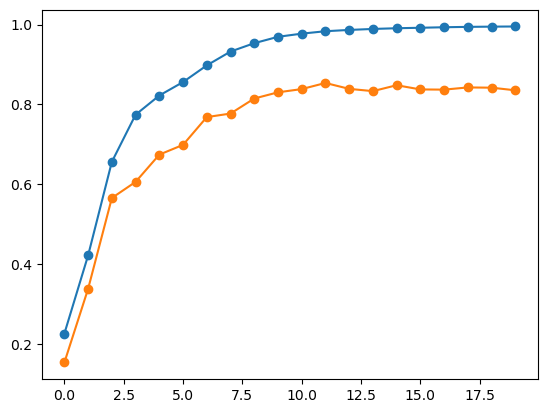

In [35]:
plt.plot(train_score, "-o")
plt.plot(test_score, "-o")
plt.show()

The graph suggests that the decision tree model is overfitting when the max depth is set to values higher than 10. This means the model is becoming too complex and is memorizing the training data, which will lead to poor performance on unseen data.